# Data wrangling

The purpose of this notebook is to make our hands durty (i.e to handle with the datasets). We will try to to clean and understand what is in the data

In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
#load data
raw_data_folder = '../../data/raw_data/' 
characters_header_name = ['movie_wiki_id','freebase_movie_id','movie_release_date', 'character_name', 'birth', 'gender', 'height', 'ethnicity', 'name', 'release_age', 'freebase_character_map_id', 'freebase_character_id', 'freebase_actor_id']
movies_header_name = ['wiki_id', 'freebase_id', 'name', 'release_date', 'revenue', 'runtime', 'languages', 'country', 'genres']
plots_header_name =['wiki_id', 'plot']


characters_df = pd.read_csv( raw_data_folder + 'character.metadata.tsv', sep = '\t', names = characters_header_name)
movies_df = pd.read_csv( raw_data_folder + 'movie.metadata.tsv', sep = '\t', names= movies_header_name, index_col= 'wiki_id' )
plots_df = pd.read_csv(raw_data_folder + 'plot_summaries.txt', sep= '\t', names = plots_header_name, index_col= 'wiki_id' )

characters_df.head(5)

,movie_wiki_id,freebase_movie_id,movie_release_date,character_name,birth,gender,height,ethnicity,name,release_age,freebase_character_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [3]:
movies_df.head()

,freebase_id,name,release_date,revenue,runtime,languages,country,genres
wiki_id,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
plots_df.head()
#check if all plots has an wiki_id
#plots_df.index.isna().sum() = 0


,plot
wiki_id,
23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
31186339,The nation of Panem consists of a wealthy Capi...
20663735,Poovalli Induchoodan is sentenced for six yea...
2231378,"The Lemon Drop Kid , a New York City swindler,..."
595909,Seventh-day Adventist Church pastor Michael Ch...


In [5]:
#clean movies dataframe 

#remove useless columns
movies_clean_df = movies_df.copy()
movies_clean_df['freebase_id']
movies_clean_df.drop('freebase_id', axis= 1, inplace= True)

#remove all freebase code such as "/m/02h40lc"
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('"/m/\w*": ', '', regex= True)
movies_clean_df['country'] = movies_clean_df['country'].str.replace('"/m/\w*": ', '', regex= True)
movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('"/m/\w*": ', '', regex= True)

#remove ""
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('"', '', regex= False)
movies_clean_df['country'] = movies_clean_df['country'].str.replace('"', '', regex= False)
movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('"', '', regex= False)


#remove {}
#before to remove all the curly brackets, let's fill with None items which have empty {}
movies_clean_df['languages'] = movies_clean_df['languages'].replace('{}', None , regex= False)
movies_clean_df['country'] = movies_clean_df['country'].replace('{}', None , regex= False)
movies_clean_df['genres'] = movies_clean_df['genres'].replace('{}', None , regex= False)


#now we can remove the brackets {}
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('{', '', regex= False)
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('}', '', regex= False)

movies_clean_df['country'] = movies_clean_df['country'].str.replace('{', '', regex= False)
movies_clean_df['country'] = movies_clean_df['country'].str.replace('}', '', regex= False)

movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('{', '', regex= False)
movies_clean_df['genres'] = movies_clean_df['genres'].str.replace('}', '', regex= False)


#remove Language in languages columns 
movies_clean_df['languages'] = movies_clean_df['languages'].str.replace('Language', '', regex= False, case = False)

#merge movies_df and plots_df
movies_clean_df =movies_clean_df.merge(plots_df, on = 'wiki_id', how= 'outer') #from 81741 to 81840

#save only th the year in released date column and convert it to int object
movies_clean_df['release_date'] = movies_clean_df['release_date'].str.replace('-.*', '', regex= True)
movies_clean_df['release_date'] = pd.to_numeric(movies_clean_df['release_date'], errors= 'coerce', downcast= 'integer') # it stil convert into float... 




In [6]:
#check if all movies has an wiki_id
print(movies_clean_df.index.isna().sum())

#check if they are unique
print(movies_clean_df.index.is_unique)

movies_clean_df.head()





0
True


,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
330,Actrius,1996.0,NaN,90.0,"Catalan , Spanish",Spain,"Drama, Comedy-drama",In order to prepare the role of an important o...
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
3746,Blade Runner,1982.0,33139618.0,116.0,"Japanese , Cantonese, English , German , Hunga...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
3837,Blazing Saddles,1974.0,119500000.0,93.0,"Yiddish , English",United States of America,"Western, Satire, Comedy","In the American Old West of 1874, construction..."


In [7]:
#  check for missing data
for columns in movies_clean_df.columns:
    missing_data = movies_clean_df[columns].isna().sum()
    print(f"{missing_data} out of {len(movies_clean_df[columns])} movies have no {columns} data, which means {missing_data/len(movies_clean_df[columns])*100}% of the data is missing")

#missing_plots = raw_plot_df['plot'].isna().sum()
#print(f"{missing_plots} out of {len(raw_plot_df['plot'])} plots have no data, which means {missing_plots/len(raw_plot_df['plot'])*100}% of the data is missing")

99 out of 81840 movies have no name data, which means 0.12096774193548387% of the data is missing
7001 out of 81840 movies have no release_date data, which means 8.554496578690127% of the data is missing
73439 out of 81840 movies have no revenue data, which means 89.73484848484848% of the data is missing
20549 out of 81840 movies have no runtime data, which means 25.108748778103617% of the data is missing
13965 out of 81840 movies have no languages data, which means 17.063782991202345% of the data is missing
8253 out of 81840 movies have no country data, which means 10.084310850439882% of the data is missing
2393 out of 81840 movies have no genres data, which means 2.9239980449657867% of the data is missing
39537 out of 81840 movies have no plot data, which means 48.31011730205279% of the data is missing


In [8]:
#clean characters dataframe
characters_clean_df = characters_df.copy()

#remove useless columns
characters_clean_df.drop('freebase_movie_id', axis= 1, inplace= True)
characters_clean_df.drop('movie_release_date', axis= 1, inplace= True)
characters_clean_df.drop('freebase_character_map_id', axis= 1, inplace= True)
characters_clean_df.drop('freebase_character_id', axis= 1, inplace= True)

In [9]:
#maybe drop ethinity columns due to proportion of avaible data
characters_clean_df['ethnicity'].isna().sum()/characters_clean_df.shape[0] * 100

76.46654196317031

In [10]:
characters_clean_df.head()


,movie_wiki_id,character_name,birth,gender,height,ethnicity,name,release_age,freebase_actor_id
0,975900,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/03wcfv7
1,975900,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0346l4
2,975900,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/01vw26l
3,975900,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/034hyc
4,975900,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/01y9xg


In [11]:
#save clean version of dataframes 
movies_clean_df.to_csv('../../data/cleaned_data/movies_data.csv')
characters_clean_df.to_csv('../../data/cleaned_data/characters_data.csv')

# Let's now try to understand the dataset

In [12]:
#idee de plot 
#distribution film par annee et par pays 
#distribution film par année et par pays subset
#distribution film par region 
#distribution film par année et par region 
#distribution film avec le premier genre

Text(0, 0.5, ' # movies released')

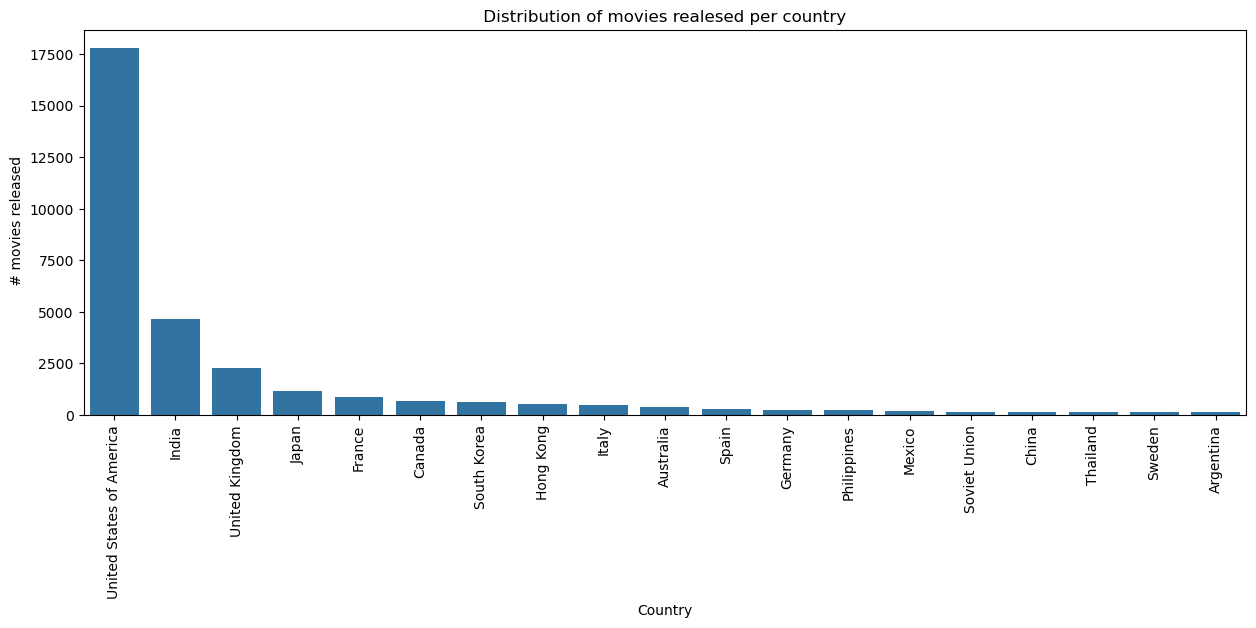

In [ ]:
#distribution of number of film realized by country
#first we focus on film realized by one unique country and not collaborate with other
dist_per_country1_df = movies_clean_df.copy(deep= True)

#drop row which containts None in column country
dist_per_country1_df.dropna(subset = ['country'], inplace=True)

#drop row which containts no plots 
dist_per_country1_df.dropna(subset= ['plot'], inplace= True) 

# now remove all film that come from a collaboration (i.e contain "," )
dist_per_country1_df = dist_per_country1_df[~ dist_per_country1_df['country'].str.contains(',', regex= False).values]

# get nbr movies released by each country
freq_per_country1_df = dist_per_country1_df['country'].value_counts()


#do a cut off 
freq_per_country1_df = freq_per_country1_df[freq_per_country1_df.values> 100]

#plot result
plt.figure(figsize=(15, 5))
sns.barplot(x= freq_per_country1_df.index, y= freq_per_country1_df.values)
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed per country ")
plt.xlabel("Country")
plt.ylabel(" # movies released")



Text(0, 0.5, ' # movies released')

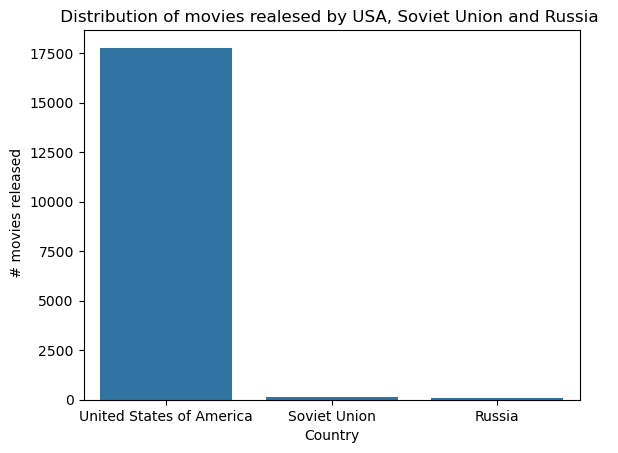

In [14]:
# lets focus on USA, Soviet Union and Russia

#di
dist_per_sub_country1_df = dist_per_country1_df[(dist_per_country1_df['country'] == 'United States of America') | (dist_per_country1_df['country'] == 'Soviet Union') | (dist_per_country1_df['country'] == 'Russia')]

freq_per_sub_country1_df = dist_per_sub_country1_df['country'].value_counts()
sns.barplot(x= freq_per_sub_country1_df.index, y= freq_per_sub_country1_df.values)
plt.title(" Distribution of movies realesed by USA, Soviet Union and Russia  ")
plt.xlabel("Country")
plt.ylabel(" # movies released")




C:\Users\ismae\AppData\Local\Temp\ipykernel_28772\196700248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_per_country1_date_df['release_date'] = dist_per_country1_date_df['release_date'].astype(int, copy= True)


Text(0, 0.5, ' # movies released')

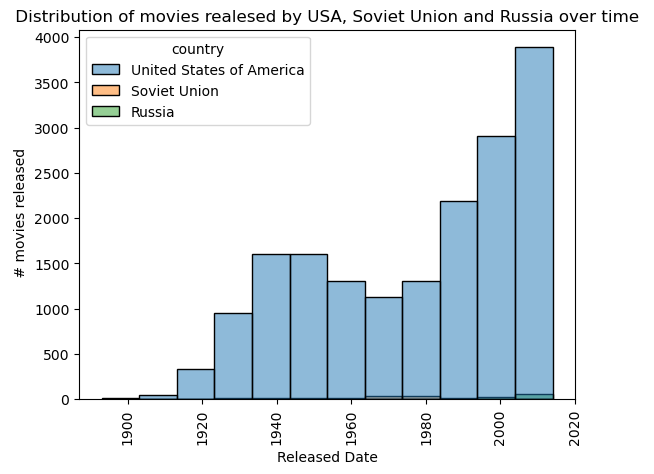

In [15]:
# lets go deeper in analysis by including time


# remove None value in realese_date column and convert it to int
dist_per_country1_date_df= dist_per_sub_country1_df.dropna(subset = ['release_date'],inplace=False)
dist_per_country1_date_df['release_date'] = dist_per_country1_date_df['release_date'].astype(int, copy= True)

#plot
sns.histplot(x ='release_date', hue= 'country', data= dist_per_country1_date_df, binwidth= 10); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by USA, Soviet Union and Russia over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

#lets do this but in separate plot since we don't see a lot...





Text(0, 0.5, ' # movies released')

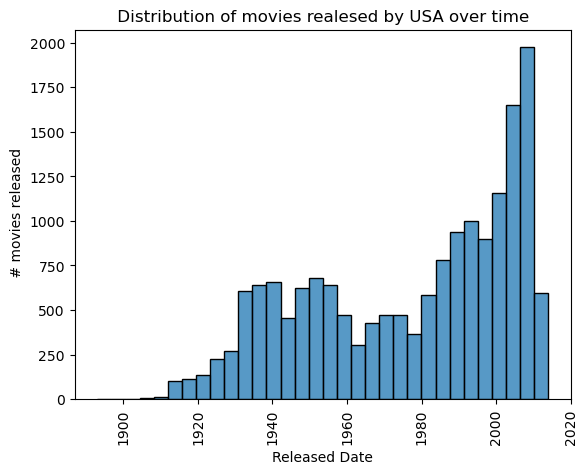

In [16]:
# get only USA data
dist_USA_date_df= dist_per_sub_country1_df[dist_per_sub_country1_df['country'] == 'United States of America']

#plot
sns.histplot(x ='release_date', data= dist_USA_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by USA over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")






Text(0, 0.5, ' # movies released')

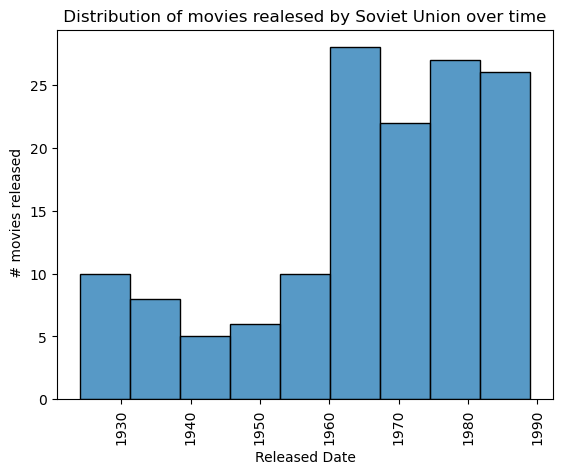

In [17]:
# get only Soviet Union  data
dist_Soviet_date_df= dist_per_sub_country1_df[dist_per_sub_country1_df['country'] == 'Soviet Union']

#plot
sns.histplot(x ='release_date', data= dist_Soviet_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by Soviet Union over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")






Text(0, 0.5, ' # movies released')

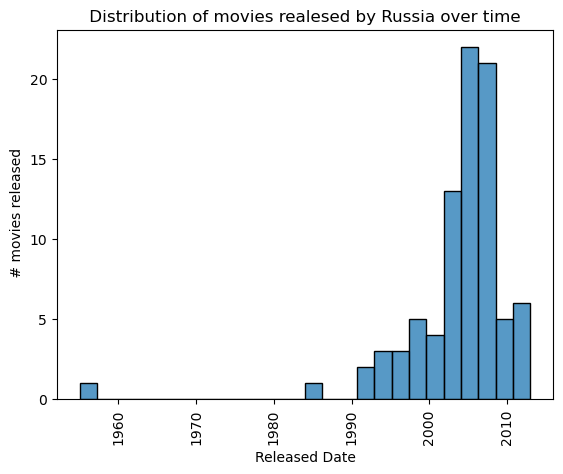

In [18]:
# get only Russia  data
dist_Russia_date_df= dist_per_sub_country1_df[dist_per_sub_country1_df['country'] == 'Russia']

#plot
sns.histplot(x ='release_date', data= dist_Russia_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by Russia over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")






Lets do the same analysis but per region 

In [19]:

print((list(dist_per_country1_df['country'].value_counts().index)))

['United States of America', 'India', 'United Kingdom', 'Japan', 'France', 'Canada', 'South Korea', 'Hong Kong', 'Italy', 'Australia', 'Spain', 'Germany', 'Philippines', 'Mexico', 'Soviet Union', 'China', 'Thailand', 'Sweden', 'Argentina', 'Russia', 'Turkey', 'Netherlands', 'Brazil', 'Egypt', 'Indonesia', 'Denmark', 'Poland', 'Iran', 'Greece', 'Malaysia', 'Pakistan', 'South Africa', 'Israel', 'Norway', 'Finland', 'German Democratic Republic', 'New Zealand', 'Sri Lanka', 'Singapore', 'Belgium', 'Cambodia', 'Ireland', 'Hungary', 'Taiwan', 'Austria', 'West Germany', 'Portugal', 'Yugoslavia', 'Czech Republic', 'Romania', 'Bulgaria', 'Morocco', 'Czechoslovakia', 'Croatia', 'Serbia', 'Bangladesh', 'Colombia', 'Tunisia', 'Democratic Republic of the Congo', 'Nigeria', 'Iceland', 'England', 'Lebanon', 'Burma', 'Venezuela', 'Senegal', 'Switzerland', 'Vietnam', 'Puerto Rico', 'Nepal', 'Chile', 'Burkina Faso', 'Algeria', 'Estonia', 'Ukraine', 'Kenya', 'Korea', 'Cuba', 'Weimar Republic', 'Republic 

In [20]:
#first lets define the different region with corresponding country in it
north_america_list = ["United States of America", "Canada", "Mexico", "Puerto Rico", "Bahamas"]
south_america_list = ["Argentina", "Brazil", "Chile", "Venezuela", "Colombia", "Uruguay", "Bolivia", "Peru", "Costa Rica", "Cuba", "Haiti", "Jamaica"]
west_europe = ["United Kingdom", "France", "Italy", "Spain", "Netherlands", "Germany", "West Germany", "Austria", "Belgium", "Switzerland", "Ireland", "Portugal", "Luxembourg", "Malta", "Weimar Republic", "England", "Scotland", "Wales", "Kingdom of Great Britain", "Nazi Germany"]
east_central_europe =["Soviet Union", "Czechoslovakia", "German Democratic Republic", "Poland", "Hungary", "Yugoslavia", "Russia", "Czech Republic", "Croatia", "Romania", "Bulgaria", "Albania", "Estonia", "Georgia", "Slovenia", "Ukraine", "Serbia", "Republic of Macedonia", "Armenia", "Georgian SSR", "Serbia and Montenegro", "Lithuania", "Slovakia", "Azerbaijan", "Federal Republic of Yugoslavia", "Socialist Federal Republic of Yugoslavia", "Uzbek SSR", "Uzbekistan", "Soviet occupation zone", "Crime", "Bosnia and Herzegovina", "Greece"]
scandinavia_north_europe = ["Sweden", "Denmark", "Norway", "Finland", "Iceland", "Northern Ireland"]
africa = ["Nigeria", "South Africa", "Egypt", "Morocco", "Tunisia", "Senegal", "Ethiopia", "Burkina Faso", "Democratic Republic of the Congo", "Cameroon", "Mali", "Algeria", "Guinea-Bissau", "Kenya", "Libya", "Zimbabwe"]
middle_east =["Israel", "Lebanon", "Jordan", "Iraq", "Iran", "United Arab Emirates", "Palestinian territories", "Kuwait", "Bahrain", "Cyprus", "Turkey"]
east_asia = ["Japan", "China", "Hong Kong", "South Korea", "Korea", "Taiwan", "Mongolia", "Vietnam", "Thailand", "Indonesia", "Malaysia", "Cambodia", "Singapore", "Philippines", "Sri Lanka", "Bhutan", "Burma"]
south_asia_india= ["India", "Pakistan", "Bangladesh", "Nepal", "Afghanistan"]
oceania = ["Australia", "New Zealand"]

#then define a function in order to sort country in corresponding region
def choice_region(country):
    if country in north_america_list:
        return 'North America'
    elif country in south_america_list:
        return 'South America'
    elif country in west_europe:
        return 'West Europe'
    elif country in east_central_europe:
        return 'East/Central Europe'
    elif country in scandinavia_north_europe:
        return 'Scandinavia/North Europe'
    elif country in africa:
        return 'Africa'
    elif country in middle_east:
        return 'Middle East'
    elif country in east_asia:
        return 'East Asia'
    elif country in south_asia_india:
        return 'South Asia/India'
    elif country in oceania:
        return 'Ociana'
    else: 
        return None
    
#finally add new column to dataset with "region" as label fill the new column
dist_per_region_df = dist_per_country1_df.assign(region= lambda x: x['country'].apply(choice_region)) #only one got None (Malayalam Language)


Text(0, 0.5, ' # movies released')

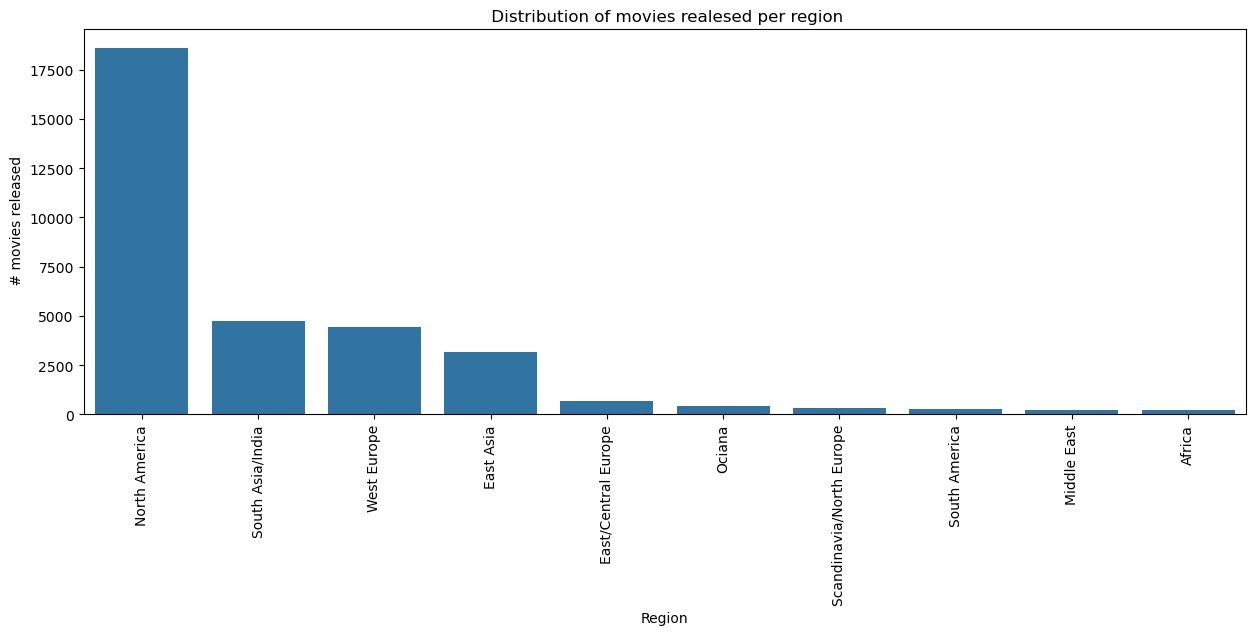

In [21]:
#distribution of number of film realized by region
# get nbr movies released by each region
freq_per_region_df = dist_per_region_df['region'].value_counts()


#do a cut off 
#freq_per_country1_df = freq_per_country1_df[freq_per_country1_df.values> 100]



#plot result
plt.figure(figsize=(15, 5))
sns.barplot(x= freq_per_region_df.index, y= freq_per_region_df.values)
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed per region")
plt.xlabel("Region")
plt.ylabel(" # movies released")


In [22]:
#lets focus now on the first 7 (North America, West Europe, South Asia/India, East Asia, East/Central Europe South America, Scandinave/North Europe)
# remove None value in realese_date column and convert it to int
dist_per_region_date_df= dist_per_region_df.dropna(subset = ['release_date'],inplace=False)
dist_per_region_date_df['release_date'] = dist_per_region_date_df['release_date'].astype(int, copy= True)


C:\Users\ismae\AppData\Local\Temp\ipykernel_28772\567686416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_per_region_date_df['release_date'] = dist_per_region_date_df['release_date'].astype(int, copy= True)


Text(0, 0.5, ' # movies released')

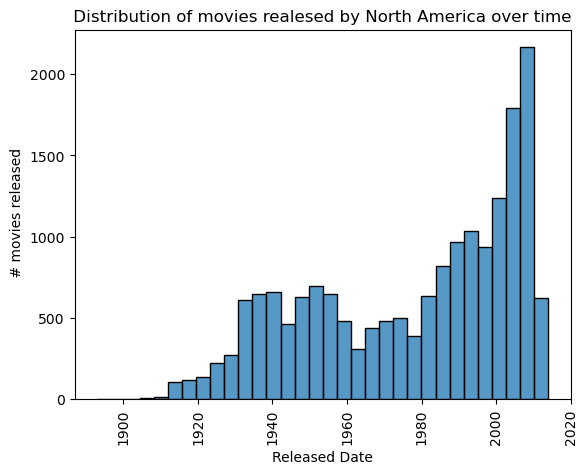

In [23]:
#North America
dist_north_america_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'North America']

#plot
sns.histplot(x ='release_date', data= dist_north_america_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by North America over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

Text(0, 0.5, ' # movies released')

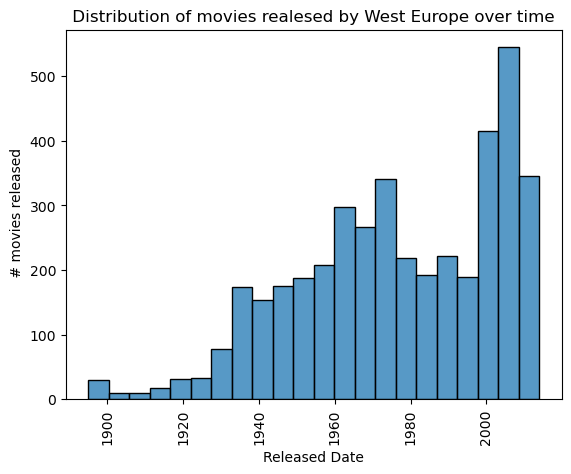

In [24]:
#West Europe
dist_west_europe_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'West Europe']

#plot
sns.histplot(x ='release_date', data= dist_west_europe_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by West Europe over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

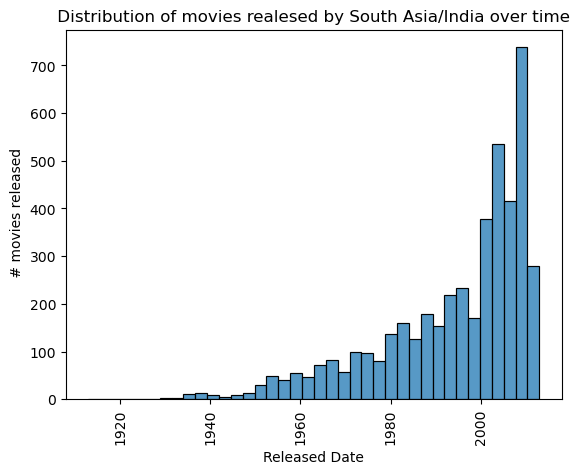

In [25]:
#South Asia/India
dist_south_asia_india_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'South Asia/India']

#plot
sns.histplot(x ='release_date', data= dist_south_asia_india_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by South Asia/India over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

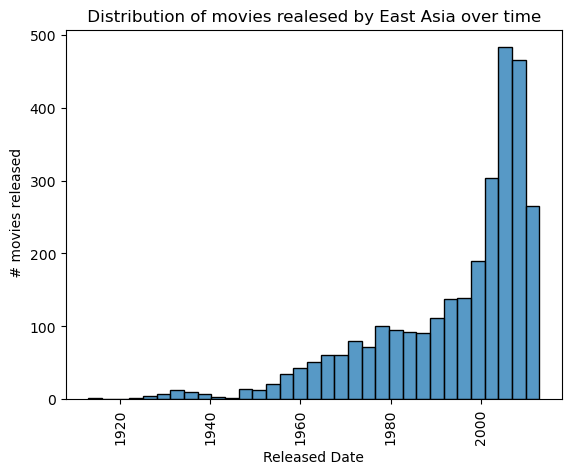

In [26]:
#East Asia
dist_east_asia_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'East Asia']

#plot
sns.histplot(x ='release_date', data= dist_east_asia_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by East Asia over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

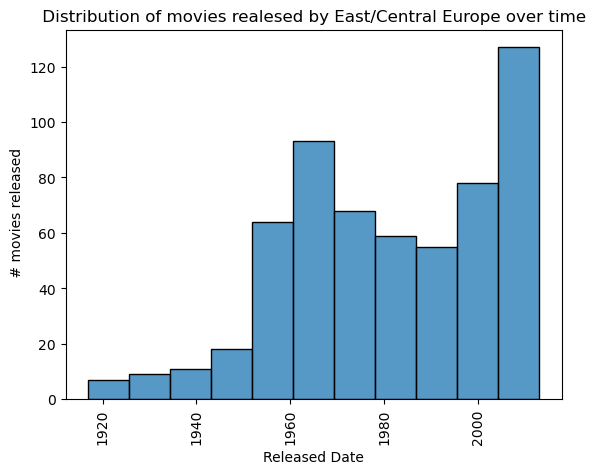

In [27]:
# East/Central Europe
dist_east_central_europe_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'East/Central Europe']

#plot
sns.histplot(x ='release_date', data= dist_east_central_europe_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by East/Central Europe over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")


Text(0, 0.5, ' # movies released')

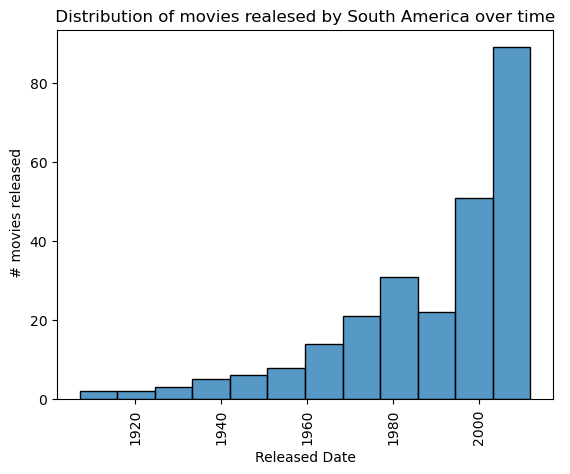

In [28]:
# East/Central Europe
dist_south_america_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'South America']

#plot
sns.histplot(x ='release_date', data= dist_south_america_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by South America over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

Text(0, 0.5, ' # movies released')

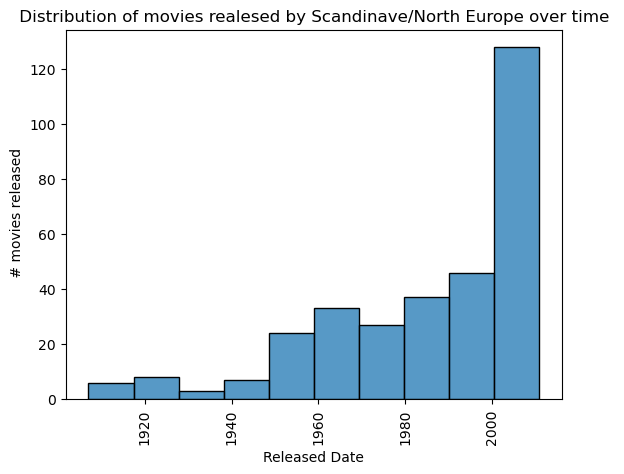

In [29]:
#Scandinavia/North Europe
dist_scandinave_north_europe_date_df= dist_per_region_date_df[dist_per_region_date_df['region'] == 'Scandinavia/North Europe']

#plot
sns.histplot(x ='release_date', data= dist_scandinave_north_europe_date_df); 
plt.xticks(rotation = 90)
plt.title(" Distribution of movies realesed by Scandinave/North Europe over time ")
plt.xlabel("Released Date")
plt.ylabel(" # movies released")

Let's now analyse movies that come from collaboration between several countries

In [ ]:
collaboration_movies_df = movies_clean_df.copy(deep= True)

# remove movies that have no country entry
collaboration_movies_df.dropna(subset =['country'], inplace = True)

# drop movies that have no plot
#collaboration_movies_df.dropna(subset= ['plot'], inplace= True) 

# transform the entries of columns 'country' into a List
collaboration_movies_df['country']= collaboration_movies_df['country'].str.split(', ')

# transform the Lists [] into Set {} since we don't care of the order (relevent for value.count())
collaboration_movies_df['country']= collaboration_movies_df['country'].apply(lambda x: set(x))


# count number of country per movie
collaboration_movies_df['country_count'] = collaboration_movies_df['country'].apply(lambda x: len(x))

# Filter for movies that are associated with more than one country
collaboration_movies_df = collaboration_movies_df[collaboration_movies_df['country_count'] > 1]
print(f'Number of movies made by more than one country: {len(collaboration_movies_df)}')



Number of movies made by more than one country: 9218


Now lets focus more on USA

Text(0, 0.5, ' # movies released')

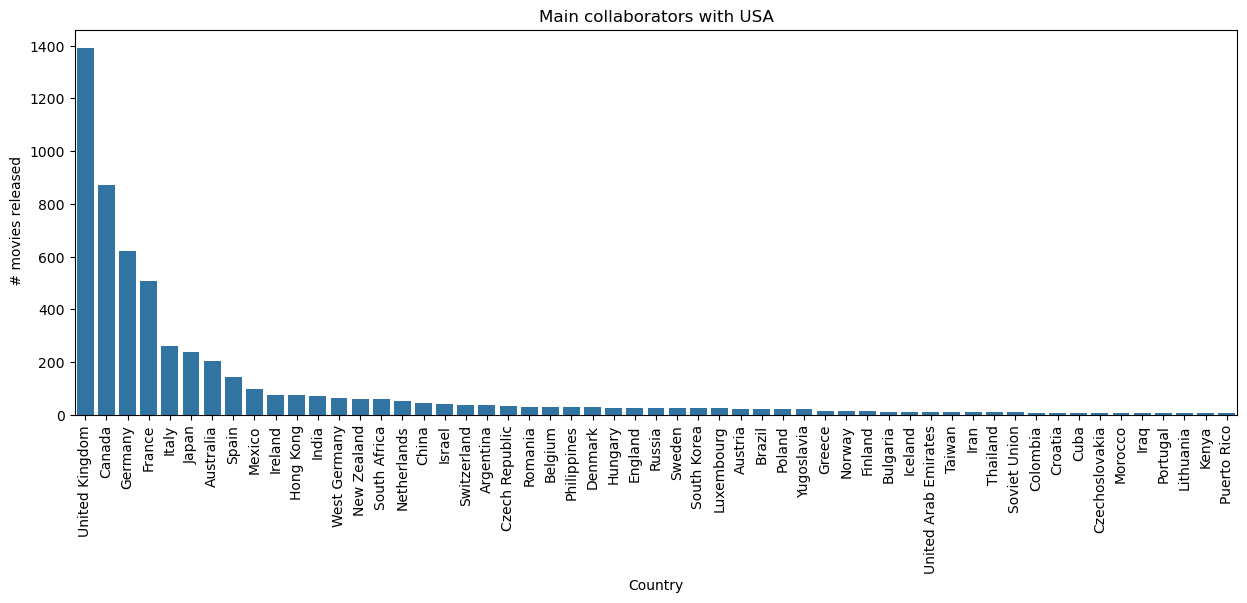

In [33]:
collaborationUSA_movies_df = collaboration_movies_df.copy(deep=True) #carefull, it doesn't really copy object in df...
#keep only collaboration with USA
collaborationUSA_movies_df= collaborationUSA_movies_df[collaborationUSA_movies_df['country'].apply(lambda x: 'United States of America' in x)]

#ici enlever USA et faire un explode puis faire un value count puis faire un crosstable
#remove USA in the set and change column name
collaborationUSA_movies_df.rename(columns= {'country' : 'collaboration'}, inplace= True)
collaborationUSA_movies_df['collaboration'].apply(lambda x: x.remove('United States of America'))

#change country_count into collaboration_count and remove 1
collaborationUSA_movies_df.rename(columns= {'country_count': 'collaboration_count'}, inplace= True)
collaborationUSA_movies_df['collaboration_count'] = collaborationUSA_movies_df['collaboration_count'] - 1

#explode column  collaboration
collaborationUSA_movies_df = collaborationUSA_movies_df.explode('collaboration')

#distribution of collaboration with US
dist_collab_USA_df= collaborationUSA_movies_df['collaboration'].value_counts()

#do a cut off 
dist_collab_USA_df = dist_collab_USA_df[dist_collab_USA_df.values> 5]

#plot 
plt.figure(figsize=(15, 5))
sns.barplot(x= dist_collab_USA_df.index, y= dist_collab_USA_df.values)
plt.xticks(rotation = 90)
plt.title("Main collaborators with USA")
plt.xlabel("Country")
plt.ylabel(" # movies released")


In [102]:
# lets go deeper in the analysis and show this distribution over time 

# remove movies that have no release date and convert date into int
print(collaborationUSA_movies_df['release_date'].isna().sum())
collabUSA_movies_date_df= collaborationUSA_movies_df[~ collaborationUSA_movies_df['release_date'].isna()]
collabUSA_movies_date_df['release_date'] = collabUSA_movies_date_df['release_date'].astype(int, copy= True)


# get distribution movies over time and by collaboration 
collab_date_df= pd.crosstab(collabUSA_movies_date_df['collaboration'], collabUSA_movies_date_df['release_date'])

# dates go from 1910 to 2013, but some dates are skipped, lets make the date continious (in year)
#print(collab_date_df.columns)
#create a similar df but with continous dates and fill this table with NaN
continous_dates = np.arange(1910, 2014)
cont_collab_date_df = pd.DataFrame( index= collab_date_df.index, columns= continous_dates )
cont_collab_date_df.columns.name = 'release_date'

#combine this two dataframes and replace NaN by zero
collab_date_df = collab_date_df.combine_first(cont_collab_date_df)
collab_date_df.fillna(0, inplace= True)
collab_date_df = collab_date_df.astype(int)

collab_date_df

111


C:\Users\ismae\AppData\Local\Temp\ipykernel_28772\2230872704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collabUSA_movies_date_df['release_date'] = collabUSA_movies_date_df['release_date'].astype(int, copy= True)


release_date,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
collaboration,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,3,1,1,4,2,1,1,1,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Aruba,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weimar Republic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# merge dates to see better the results
# we will fill this table dates per dates 
merge_collab_date_df = pd.DataFrame( index= collab_date_df.index )
merge_collab_date_df.columns.name = 'release_date'


# combine dates with a bin time = 10 
time_bin = 10
nbr_dates= len(collab_date_df.columns)
date_index = 0
begin_date_index = date_index
for i in range(nbr_dates//time_bin): #iteration entre bin
    current_sum = 0
    for j in range(time_bin): #iteration dans le bin
        # perform the sum within the bin
        current_sum += collab_date_df.iloc[:,date_index]
        date_index += 1
    #fill the table 
    end_date_index = date_index -1
    column_name = f'[{collab_date_df.columns[begin_date_index]} - {collab_date_df.columns[end_date_index]}]'
    merge_collab_date_df[column_name] = current_sum.values

    #actualise index
    begin_date_index = date_index

#for the last date 
current_sum = 0
for i in range(nbr_dates%time_bin):
    current_sum += collab_date_df.iloc[:,date_index]
    date_index += 1

#update last column 
end_date_index = date_index -1 
column_name = f'[{collab_date_df.columns[begin_date_index]} - {collab_date_df.columns[end_date_index]}]'
merge_collab_date_df[column_name] = current_sum.values


merge_collab_date_df



release_date,[1910 - 1919],[1920 - 1929],[1930 - 1939],[1940 - 1949],[1950 - 1959],[1960 - 1969],[1970 - 1979],[1980 - 1989],[1990 - 1999],[2000 - 2009],[2010 - 2013]
collaboration,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,4,1
Albania,0,0,0,0,0,0,0,0,0,0,1
Argentina,0,1,1,0,0,2,2,9,3,16,2
Armenia,0,0,0,0,0,0,0,0,1,1,0
Aruba,0,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
Weimar Republic,0,1,1,0,0,0,0,0,0,0,0
West Germany,0,0,0,2,3,11,16,31,1,0,0
Yugoslavia,0,0,0,0,0,2,3,13,3,0,0


In [193]:
#now lets consider only few countries
country_list = ['Canada', 'China', 'England', 'France', 'German Democratic Republic', 'Germany', 'Hong Kong', 'India', 'Iraq', 'Japan', 'Kingdom of Great Britain', 'Russia', 'Soviet Union', 'United Kingdom', 'Weimar Republic', 'West Germany']
merge_collab_date_df.loc[country_list, :]


release_date,[1910 - 1919],[1920 - 1929],[1930 - 1939],[1940 - 1949],[1950 - 1959],[1960 - 1969],[1970 - 1979],[1980 - 1989],[1990 - 1999],[2000 - 2009],[2010 - 2013]
collaboration,,,,,,,,,,,
Canada,1,0,3,3,4,10,29,101,155,469,75
China,0,0,0,0,0,0,0,3,3,26,10
England,0,1,0,1,1,2,2,3,6,8,3
France,1,2,1,6,12,33,21,39,130,200,53
German Democratic Republic,0,0,0,0,0,0,0,0,1,0,0
Germany,0,1,4,1,2,4,10,18,109,432,34
Hong Kong,0,0,0,0,0,1,10,14,10,30,9
India,0,0,0,0,1,1,2,1,6,39,20
Iraq,0,0,0,0,0,0,0,0,0,7,0


Text(58.2222222222222, 0.5, 'Collaborators')

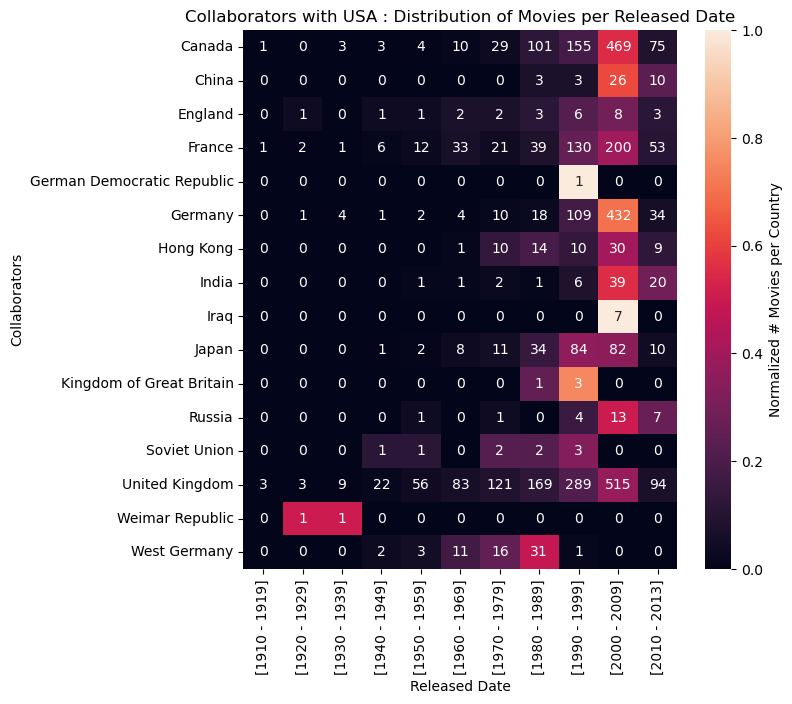

In [192]:
#lets look at the corresponding heatmap
# we are not interested in absolut value but in the variation of number of movies produced, so let's just normalize each row
normelize_merge_collab_date_df = merge_collab_date_df.loc[country_list, :].div(merge_collab_date_df.loc[country_list, :].sum(axis=1), axis=0)
plt.figure(figsize=(7, 7))
sns.heatmap(normelize_merge_collab_date_df.loc[country_list, :], fmt= '.0f', annot = merge_collab_date_df.loc[country_list, :], cbar_kws={'label': 'Normalized # Movies per Country'})
plt.title("Collaborators with USA : Distribution of Movies per Released Date")
plt.xlabel("Released Date")
plt.ylabel("Collaborators")


In [ ]:
#idee en plus 
# de manière interactif banger permettant de selectionner la date 
# faire nbr de film par date au usa 
# nbr de film par date des collaborateur 
